In [1]:
%matplotlib inline
import numpy as np
import keras.backend as K
from keras import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import copy

import Environment as E
import importlib
import matplotlib.pyplot as plt
import Heatmap as H
import GaussianTrashSource
import random
import tensorflow as tf

Using TensorFlow backend.


## Parameters

In [2]:
# General

n_agents = 1
n_trash = 2

#Policy Gradient
n_episodes = 5000
n_steps = 20
gamma = 1
n_runs = 1

# Model

time_steps = 1
grid_size_w = 5
grid_size_h = 5
n_actions = 5
trash_prob = 1
nothing_reward=0
seed=0

n_channels = time_steps + time_steps + 1
number_print = n_steps-1


env_reset_freq = n_episodes #Environment/trash locations change every env_reset_freq episodes set to n_episodes for no change
heatmap = H.Heatmap(keep_track_of_steps=n_steps)

## Model

## Policy Gradient

In [3]:
from Motion import Motion

def tuple_to_batch(known_data):
    batch = []
    for i,agent_pos in enumerate(known_data[2]):
        batch.append(np.concatenate((known_data[0],known_data[1],known_data[2][i:i+1])))
    batch = np.array(batch)
    return batch

In [4]:
# data_i = Input(shape=(n_channels, grid_size_w, grid_size_h))
# conv_1 = Conv2D(16, (2, 2), activation="relu", data_format="channels_first")(data_i)
# conv_2 = Conv2D(32, (2, 2), activation="relu", data_format="channels_first")(conv_1)
# pool_1 = MaxPooling2D(data_format="channels_first")(conv_2)
# drop_1 = Dropout(0.25)(pool_1)
# flat_1 = Flatten()(drop_1)
# feed_1 = Dense(64, activation="relu")(flat_1)
# drop_2 = Dropout(0.25)(feed_1)
# feed_2 = Dense(n_actions, activation="softmax")(drop_2)
# data_o = feed_2


#reduced network for faster training
data_i = Input(shape=(n_channels, grid_size_w, grid_size_h))
flat_1 = Flatten()(data_i)
feed_1 = Dense(64, activation="relu")(flat_1)
drop_2 = Dropout(0.1)(feed_1)
feed_2 = Dense(n_actions, activation="softmax")(drop_2)
data_o = feed_2

model = Model(inputs=data_i, outputs=data_o)

### THE ONLY DIFFERENCE FROM Q-Learning loss=policy_loss
def policy_loss(yPred,reward_sums):
    return  - K.sum(K.log(K.clip(yPred, 0.000001,1))*reward_sums, axis = 1)

model.compile(optimizer="adagrad", loss=policy_loss)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 5, 5)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 5,189
Trainable params: 5,189
Non-trainable params: 0
_________________________________________________________________


Episode 1 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 0
In Step 19 the average reward of 19 is 0.0 
Actions: [3. 6. 2. 5. 3.]
[[2 7 5 0 0]
 [0 2 0 0 0]
 [1 2 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


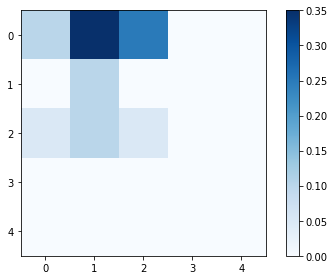

Episode 26 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 25
In Step 19 the average reward of 19 is 0.0 
Actions: [4. 5. 2. 6. 2.]
[[7 2 2 1 0]
 [2 2 2 2 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


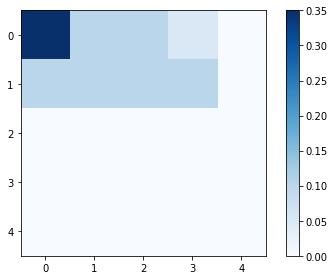

Episode 51 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 50
In Step 19 the average reward of 19 is 1.5789473684210527 
Actions: [1. 3. 7. 3. 5.]
[[0 0 0 0 0]
 [4 1 0 0 0]
 [4 0 0 0 0]
 [1 0 0 0 0]
 [6 3 1 0 0]]


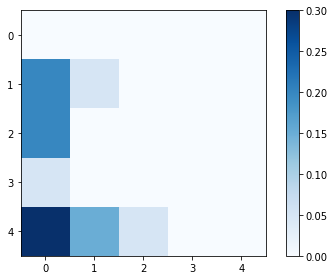

Episode 76 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 75
In Step 19 the average reward of 19 is 1.5789473684210527 
Actions: [1. 3. 8. 6. 1.]
[[1 0 0 0 0]
 [2 0 0 0 0]
 [1 0 0 0 0]
 [2 1 1 0 0]
 [7 4 1 0 0]]


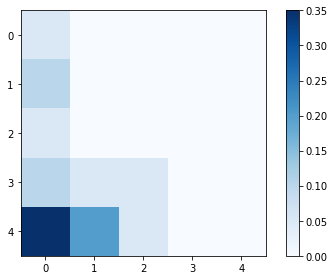

Episode 101 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 100
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 1.  1. 14.  1.  2.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]
 [ 6 10  0  0  0]]


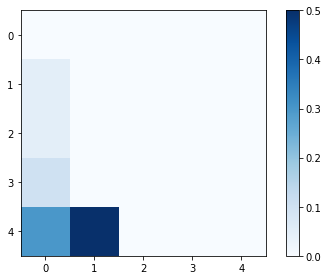

Episode 126 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 125
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 2.  6. 10.  1.  0.]
[[1 1 1 0 0]
 [0 0 1 0 2]
 [0 0 1 2 3]
 [0 0 0 2 1]
 [0 0 0 5 0]]


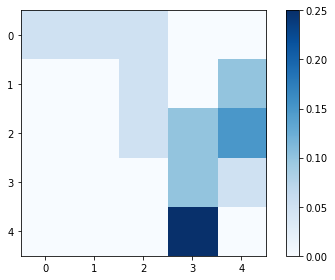

Episode 151 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 150
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 1.  3. 14.  1.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]
 [ 2 11  3  0  0]]


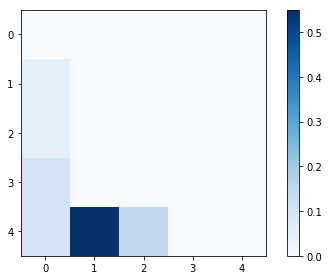

Episode 176 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 175
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  3. 15.  1.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2 13  2  0  0]]


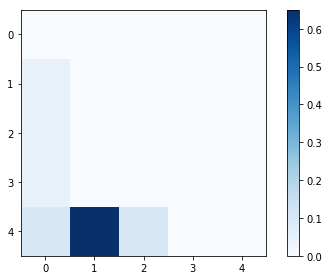

Episode 201 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 200
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


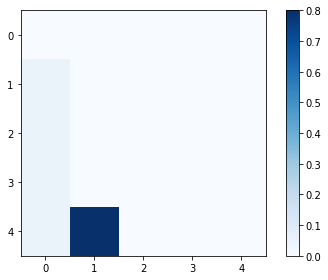

Episode 226 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 225
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  1. 17.  0.  1.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


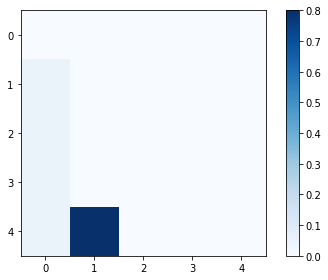

Episode 251 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 250
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 1.  3. 15.  0.  0.]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [1 5 3 7 0]]


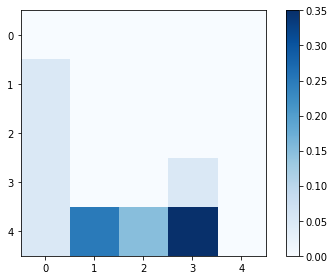

Episode 276 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 275
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


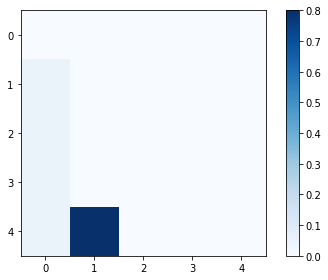

Episode 301 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 300
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  2. 17.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  4 12  0  0]]


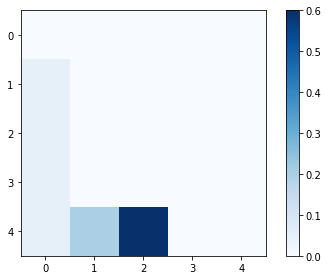

Episode 326 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 325
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  3. 15.  0.  1.]
[[0 0 0 0 0]
 [2 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 9 5 1 0]]


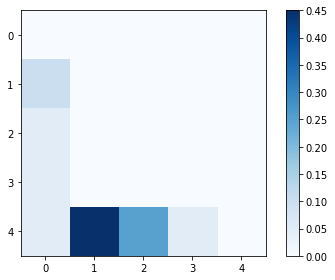

Episode 351 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 350
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


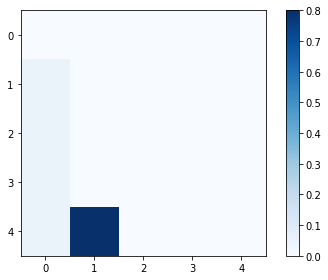

Episode 376 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 375
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2 15  0  0  0]]


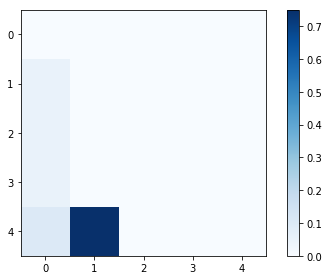

Episode 401 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 400
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  2. 16.  1.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2 15  0  0  0]]


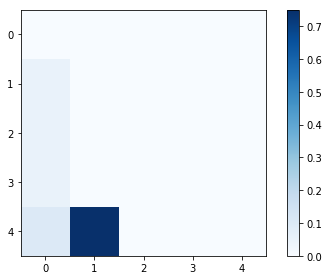

Episode 426 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 425
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 1.  1. 17.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  1  0  0  0]
 [ 1 15  0  0  0]]


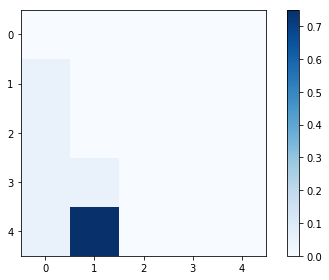

Episode 451 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 450
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  2. 16.  1.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2 15  0  0  0]]


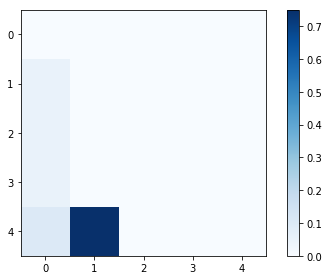

Episode 476 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 475
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


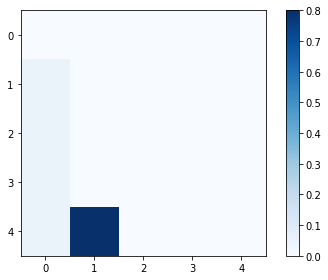

Episode 501 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 500
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


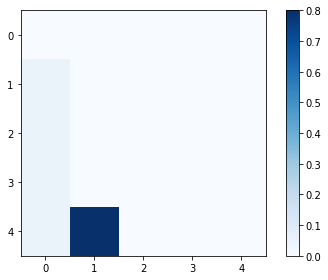

Episode 526 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 525
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


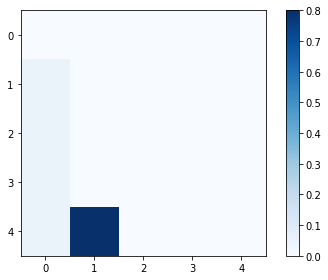

Episode 551 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 550
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


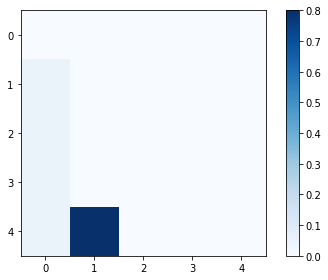

Episode 576 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 575
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


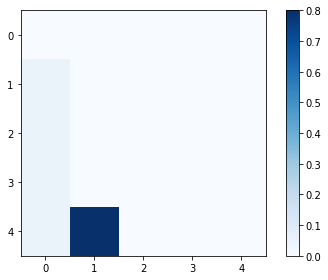

Episode 601 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 600
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


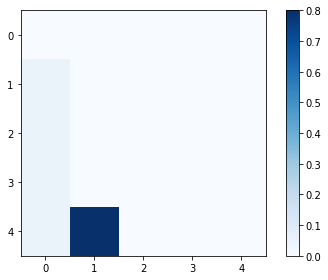

Episode 626 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 625
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  2. 17.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 15  1  0  0]]


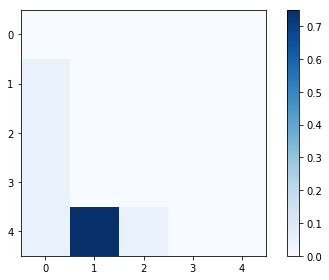

Episode 651 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 650
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


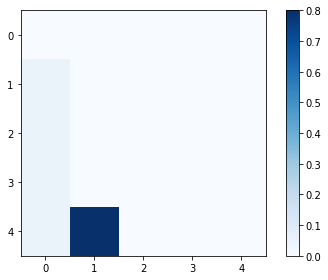

Episode 676 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 675
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


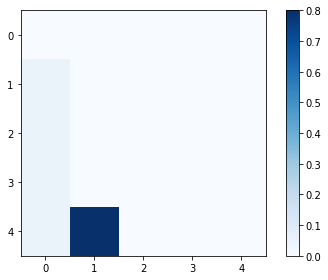

Episode 701 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 700
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


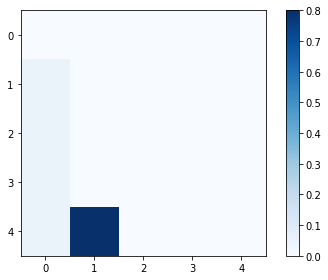

Episode 726 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 725
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


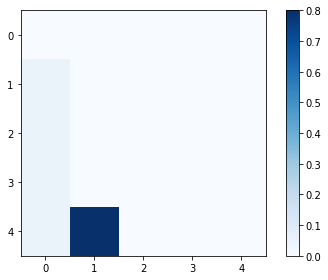

Episode 751 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 750
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


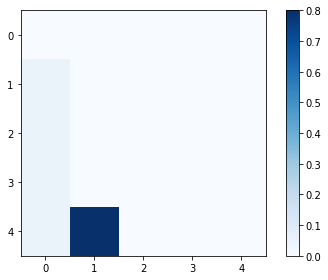

Episode 776 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 775
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


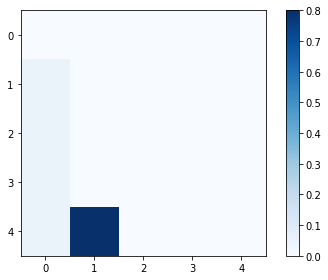

Episode 801 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 800
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  2. 16.  1.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2 15  0  0  0]]


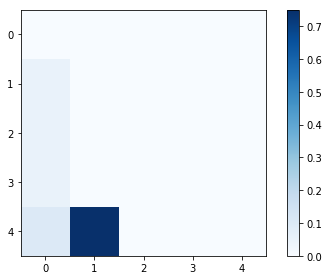

Episode 826 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 825
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


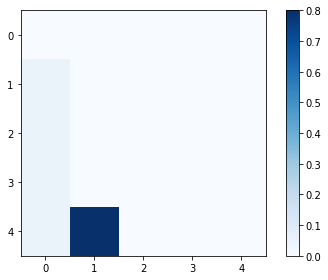

Episode 851 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 850
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


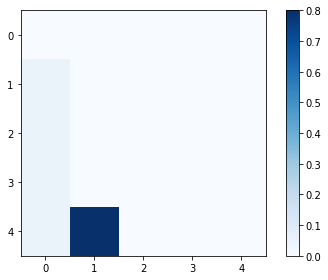

Episode 876 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 875
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


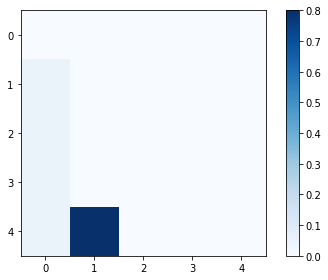

Episode 901 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 900
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  1. 17.  0.  1.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


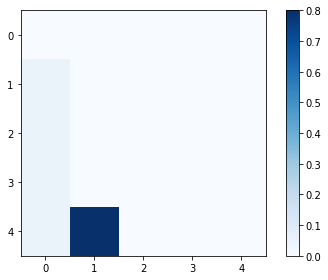

Episode 926 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 925
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


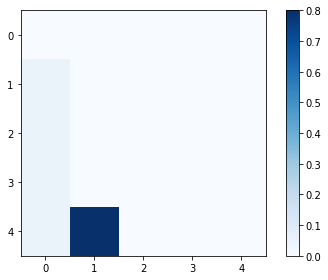

Episode 951 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 950
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


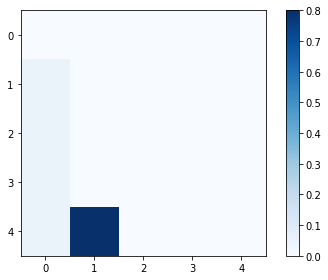

Episode 976 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 975
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


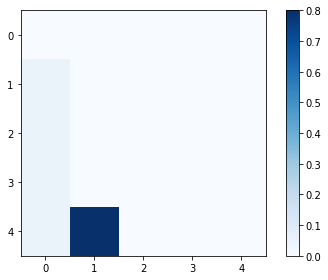

Episode 1001 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1000
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


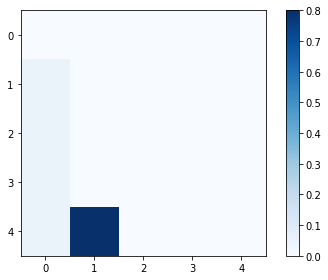

Episode 1026 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1025
In Step 19 the average reward of 19 is 1.0526315789473684 
Actions: [ 0.  1. 17.  0.  1.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


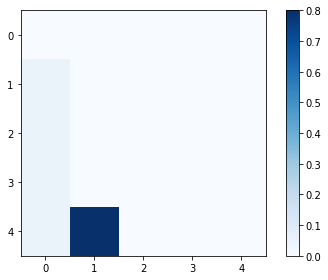

Episode 1051 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1050
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


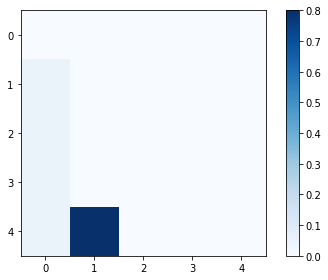

Episode 1076 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1075
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


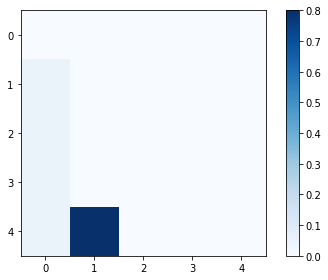

Episode 1101 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1100
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2 15  0  0  0]]


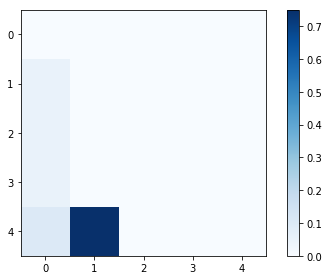

Episode 1126 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1125
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


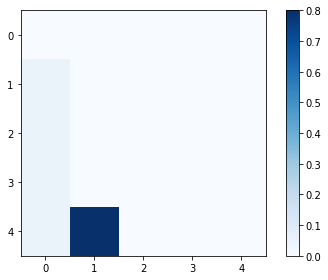

Episode 1151 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1150
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


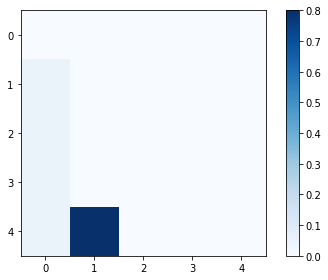

Episode 1176 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1175
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


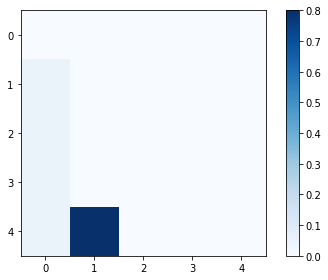

Episode 1201 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1200
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


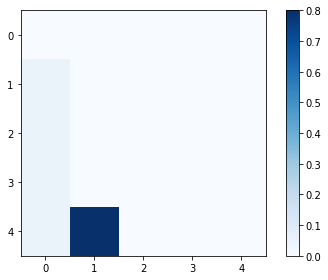

Episode 1226 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1225
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  3. 16.  0.  0.]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 3 9 4 0]]


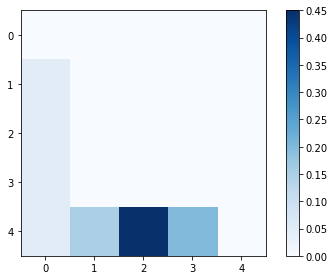

Episode 1251 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1250
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


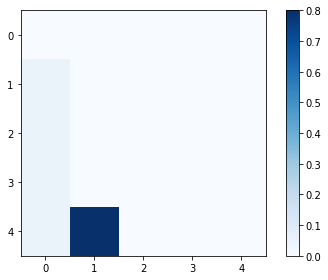

Episode 1276 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1275
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


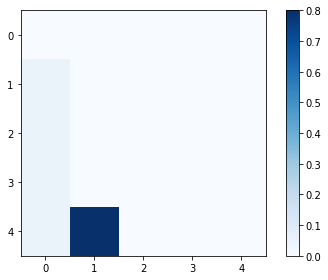

Episode 1301 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1300
In Step 19 the average reward of 19 is 0.0 
Actions: [ 0.  1. 17.  0.  1.]
[[ 0  1  0  0  0]
 [ 0  1  0  0  0]
 [ 0  1  1  0  0]
 [ 0  0  1  0  0]
 [ 0  0 15  0  0]]


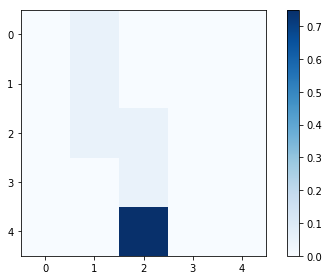

Episode 1326 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1325
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


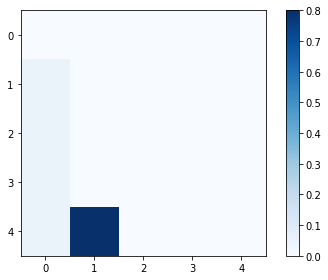

Episode 1351 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1350
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


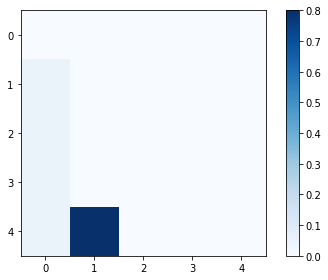

Episode 1376 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1375
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


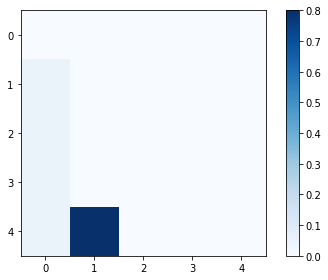

Episode 1401 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1400
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


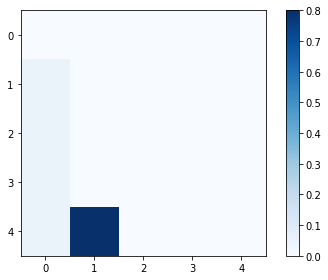

Episode 1426 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1425
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  2. 17.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 15  1  0  0]]


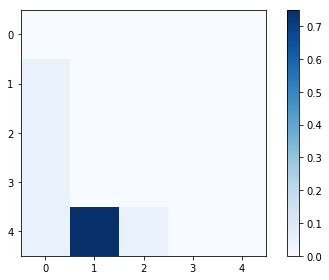

Episode 1451 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1450
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


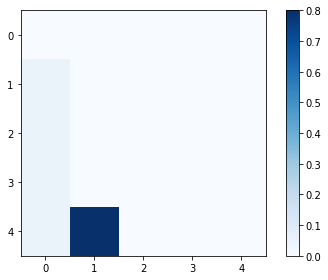

Episode 1476 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1475
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


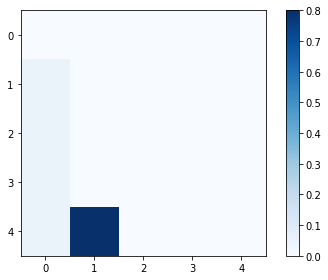

Episode 1501 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1500
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  2. 17.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 12  4  0  0]]


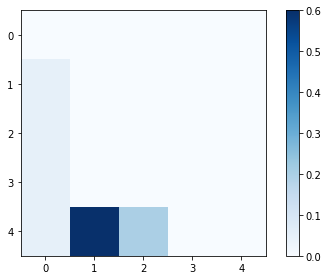

Episode 1526 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1525
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


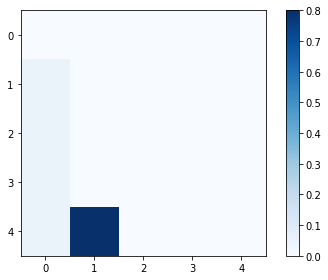

Episode 1551 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1550
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


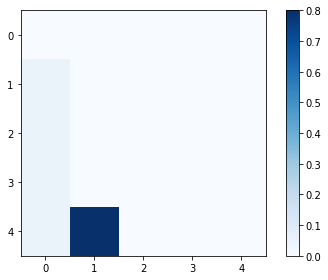

Episode 1576 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1575
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


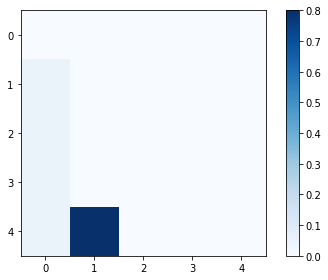

Episode 1601 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1600
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


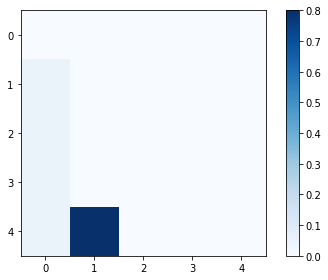

Episode 1626 of 5000
Trash Source 0 has its mean at [4, 1]
Trash Source 1 has its mean at [1, 4]
Current episode is 1625
In Step 19 the average reward of 19 is 0.5263157894736842 
Actions: [ 0.  1. 18.  0.  0.]
[[ 0  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1 16  0  0  0]]


KeyboardInterrupt: 

In [5]:
list_avg_rwd = []
for ep in range(n_episodes):
    
    d = []
    action_avg = np.zeros((10000,5))
    list_steps = []
    all_time_reward = 0
    all_time_reward_avg_history = []
    all_time_reward_steps_history = []

    if ep% env_reset_freq ==0: seed = np.random.choice(10,1)[0]
    if ep% 25 == 0:
        print("Episode {} of {}".format(ep + 1, n_episodes))
        
    R = np.zeros((n_runs, n_steps, n_agents, n_actions))
    X_runs = np.zeros((n_runs, n_steps, n_agents, n_channels, grid_size_w, grid_size_h))
    action_history = np.zeros((n_runs, n_steps, n_agents))


    for run in range(n_runs):
        
        #reset environment with same trash location
        random.seed(seed)
        env = E.Environment(dim = (grid_size_h,grid_size_w),reward_eat_trash=10, 
                            reward_invalid_move=0, reward_nothing_happend=nothing_reward, 
                            trash_appearence_prob=1, number_trash_sources=n_trash, saved_timesteps=time_steps )
        _, _,  _, _, trash_sources = env.debug_data_export()
        for k in range(n_agents):
            env.add_agent(coord=(k,0),capacity=100000)
        X = tuple_to_batch(env.export_known_data()) 

        
        for step in range(n_steps):
            #Determine policy decisions in current state
            P_vals = model.predict(X)
            P_vals = P_vals.tolist()
            Fixed_P_vals = [[(p**2)**0.5 for i,p in enumerate(pvals) if i<len(pvals)-1] for pvals in P_vals]
            for i,pvals in enumerate(Fixed_P_vals):Fixed_P_vals[i].append(1-sum(pvals))
                
            actions = [np.random.choice(5,1,p=pvals)[0] for pvals in Fixed_P_vals]

            #New known state and rewards
            X_reward = env.move_agents(actions)
            heatmap.add_map(X_reward[1][-1]) #Get the current position of all agents
            
            #After all agents move
            X_new = tuple_to_batch(X_reward[:3])
            rewards = X_reward[3]

            all_time_reward += sum(rewards)
            action_avg[step%number_print, : ] = 0
            action_avg[step%number_print,actions[0]]= 1
            d.append(sum(rewards))
            while(len(d)>number_print):
                del(d[0])
            if(step>0 and step% number_print == 0 and ep%25==0 and run==0): 
                _, _,  _, _, trash_sources = env.debug_data_export()
                for idx,trash_source in enumerate(trash_sources): 
                    print("Trash Source {} has its mean at {}".format(idx, trash_source.mean))
                    
                mean = sum(d) / number_print
                print('Current episode is', ep)
                print("In Step {} the average reward of {} is {} ".format(step, number_print, mean))
                print("Actions: {}".format(np.sum(action_avg, axis = 0)))
                list_avg_rwd.append(mean)
                list_steps.append(step)
                print(heatmap.get_heatmap()) #Heatmap
                heatmap.show_heatmap()



            for agent_i in range(n_agents):
                action_history[run,step,agent_i] = int(actions[agent_i]) #copy actions to history
                X_runs[run,step,agent_i] = copy.copy(X[agent_i]) #copy current state to X_runs
                R[run, step, agent_i, actions[agent_i]] = rewards[agent_i] #copy current reward to runs reward
                    
            #update state
            X = X_new
        
    for r in range(n_runs):
        for agent_i in range(n_agents): 
            for j,prev in enumerate(range(n_steps).__reversed__()):
                if j>0: R[r, prev, agent_i, int(action_history[r,prev,agent_i])] += R[r, prev+1, agent_i, int(action_history[r,prev+1,agent_i])]*gamma  
#     if(step>0 and step% number_print == 0 and ep%25==0):print(R)

    X_fit = X_runs.reshape((n_runs * n_steps * n_agents, n_channels, grid_size_w, grid_size_h))
    R_fit = R.reshape((n_runs * n_steps * n_agents, n_actions))
    model.train_on_batch(X_fit, R_fit)

In [ ]:
###### print('Xr:', X_runs[1][6])
print('R:', R[1][3])
# print(len(X_runs[0]))
#epochs may be changed
# X_fit = X_runs.reshape((n_runs * n_steps * n_agents, n_channels, grid_size_w, grid_size_h))
# R_fit = R.reshape((n_runs * n_steps * n_agents, n_actions))
print('Xf:', X_fit[16])
print('Rf:', R_fit[13])
# model.train_on_batch(X_fit, R_fit)

In [ ]:
len(list_avg_rwd)

## sum(list_avg_rwd[70:])